In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [37]:
# Load data
train_df = pd.read_csv('/content/train (1).csv')
test_df  = pd.read_csv('/content/test (1).csv')

train_df.info()
train_df.head()


# Drop id column only


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8459 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8460 non-null   object 
 6   Hepatomegaly   8457 non-null   object 
 7   Spiders        8448 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6625 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8343 non-null   float64
 13  Alk_Phos       8453 non-null   float64
 14  SGOT           8449 non-null   float64
 15  Tryglicerides  6578 non-null   float64
 16  Platelets      14418 non-null  float64
 17  Prothrombin    14981 non-null  float64
 18  Stage 

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1481.0,Placebo,12963.0,F,N,Y,N,N,2.4,346.0,3.34,70.0,1212.0,122.45,118.0,117.0,12.2,4.0,C
1,1,2580.0,D-penicillamine,20819.0,F,N,N,N,N,0.6,NaN,4.52,51.0,645.0,74.40,NaN,181.0,10.4,3.0,C
2,2,837.0,D-penicillamine,12307.0,F,N,Y,Y,N,6.1,586.0,2.73,89.0,2045.0,196.85,90.0,228.0,10.4,3.0,D
3,3,3021.0,NaN,17532.0,F,NaN,NaN,NaN,N,0.6,NaN,3.34,NaN,NaN,NaN,NaN,388.0,10.4,3.0,C
4,4,1980.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.8,NaN,3.65,NaN,NaN,NaN,NaN,190.0,11.1,4.0,C


In [38]:
test_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,1614.0,Placebo,21281.0,F,N,N,N,N,0.6,257.0,3.50,44.0,1345.0,93.00,68.0,NaN,9.7,4.0
1,15001,2573.0,D-penicillamine,20834.0,F,N,N,N,N,0.6,217.0,4.19,13.0,678.0,45.00,75.0,356.0,9.6,3.0
2,15002,1367.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.8,NaN,3.03,NaN,NaN,NaN,NaN,312.0,10.6,2.0
3,15003,1080.0,Placebo,15895.0,M,N,N,N,N,2.3,201.0,3.55,44.0,1623.0,237.15,56.0,224.0,13.6,2.0
4,15004,3853.0,Placebo,14872.0,F,N,N,N,N,0.7,259.0,3.77,44.0,685.0,97.65,93.0,249.0,11.0,1.0


In [39]:
train_df.drop(['id'], axis=1, inplace=True)


In [40]:
# -------- SIMPLE NaN FIX --------
train_df = train_df.dropna()     # remove missing rows
test_df  = test_df.fillna(0)     # fill missing test values
# --------------------------------

In [41]:
# Label Encoding target if needed
#le = LabelEncoder()
#train_df['Status'] = le.fit_transform(train_df['Status'])   # C,CL,D → 0,1,2


#If a numeric column represents:

#categories

#levels

#classes

#stages

#groups

#labels encoded as numbers

#👉 Treat it as CATEGORICAL.


In [42]:
#cat_cols = ['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage']
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('NObeyesdad')   # target
train_df = pd.get_dummies(train_df, columns=cat_cols, drop_first=True, dtype=int)

In [43]:
# Outlier removal
category_col = 'Status'
numeric_cols = ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper',
                'Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']

In [44]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(train_df, numeric_cols)
print(f"Before: {train_df.shape[0]} rows, After: {df_clean.shape[0]} rows")

Before: 6298 rows, After: 3928 rows


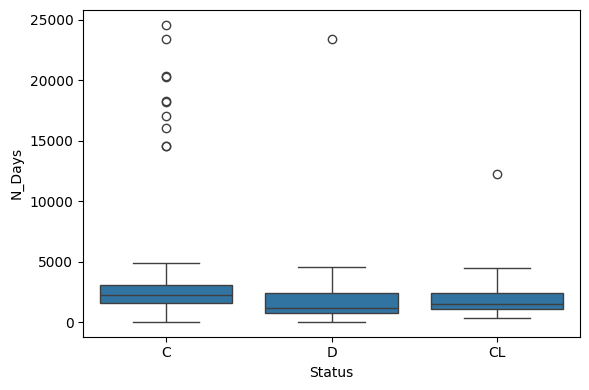

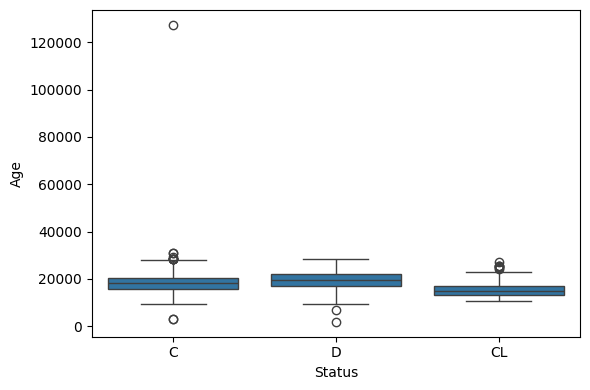

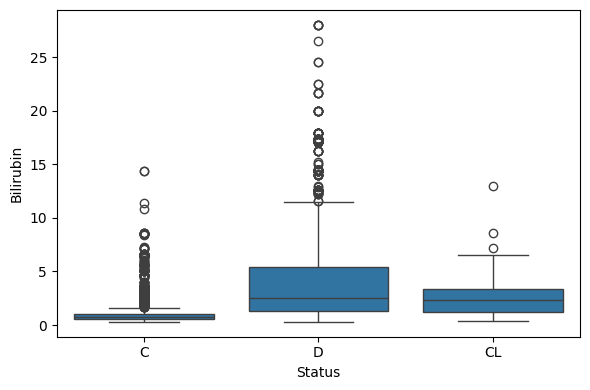

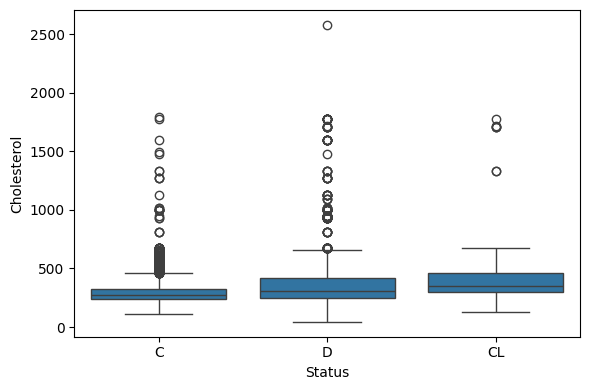

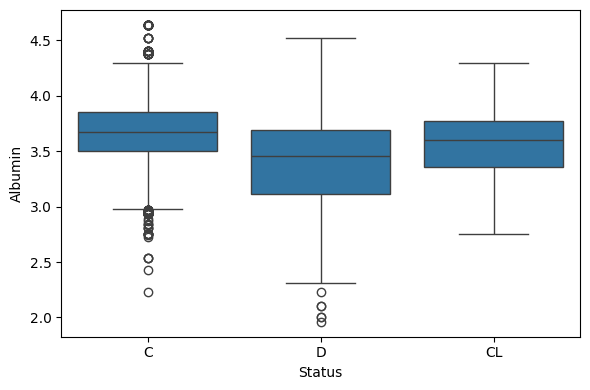

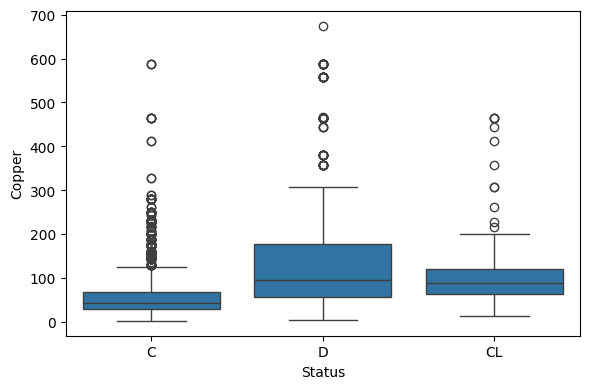

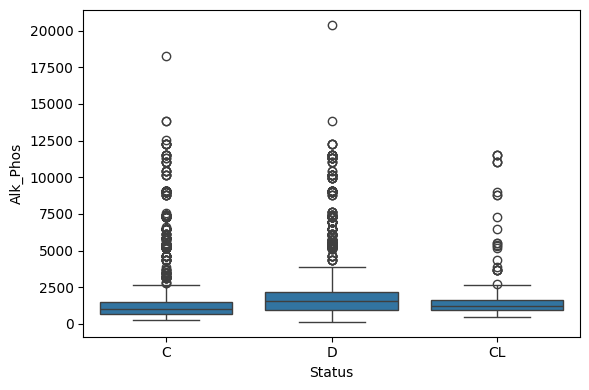

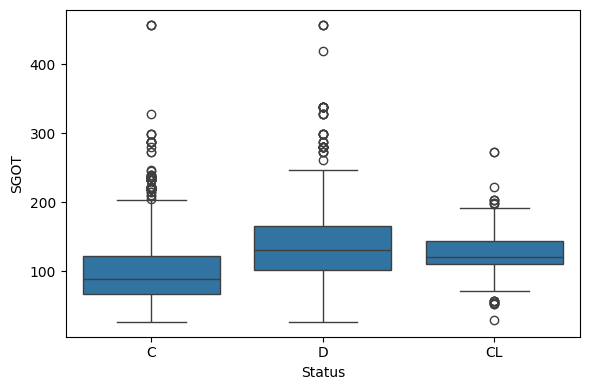

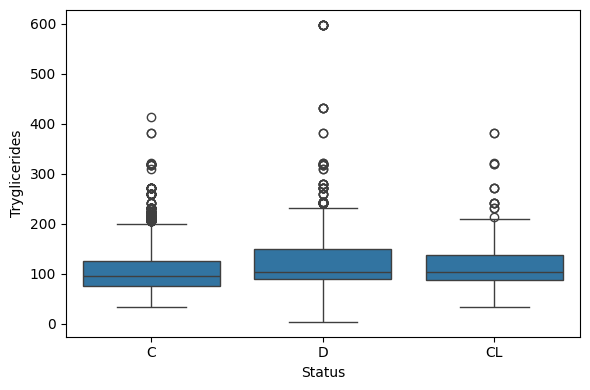

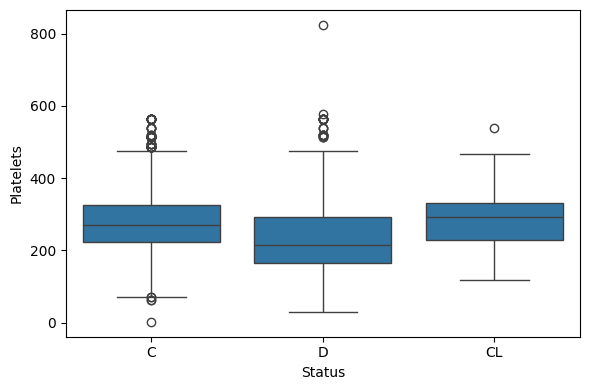

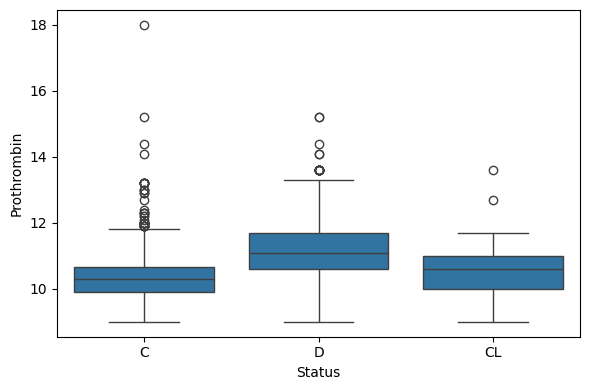

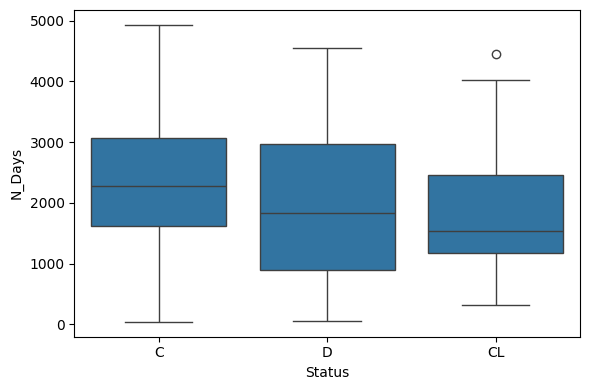

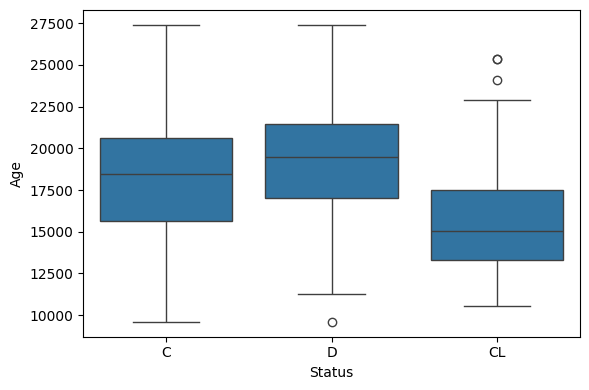

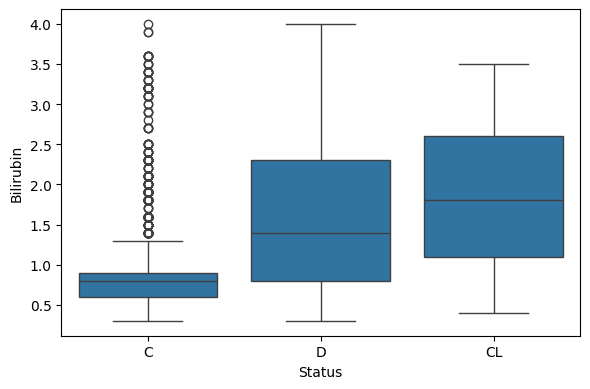

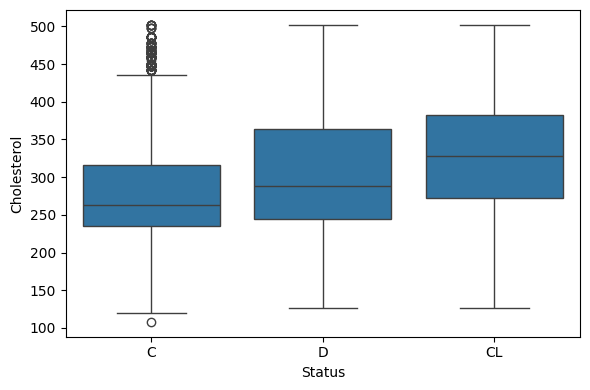

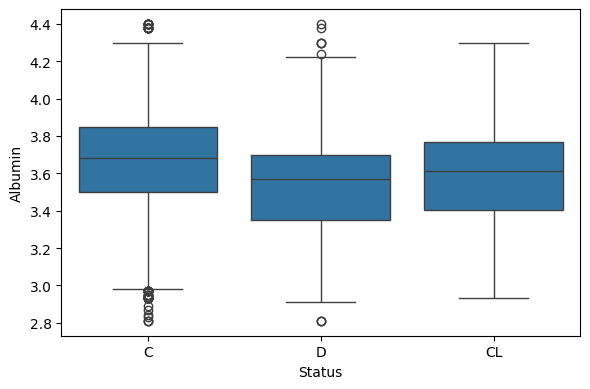

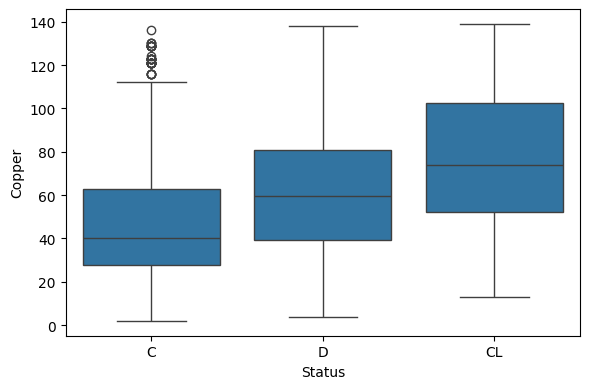

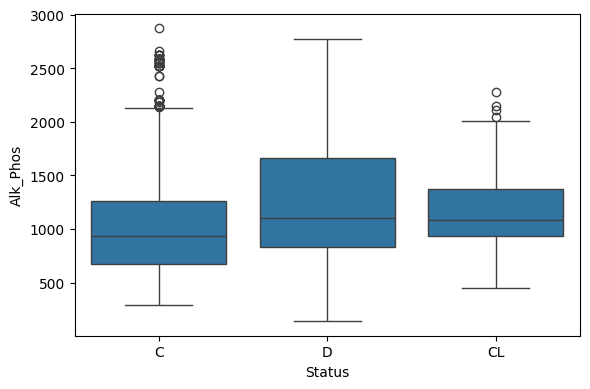

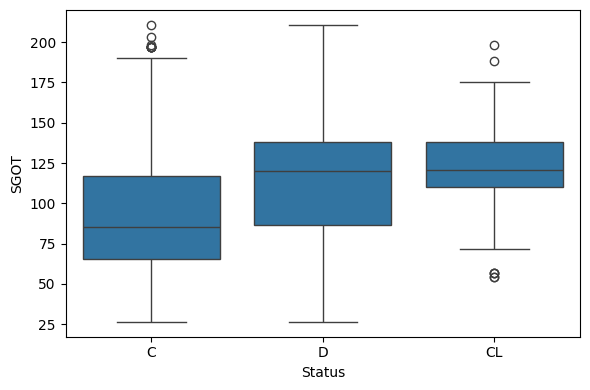

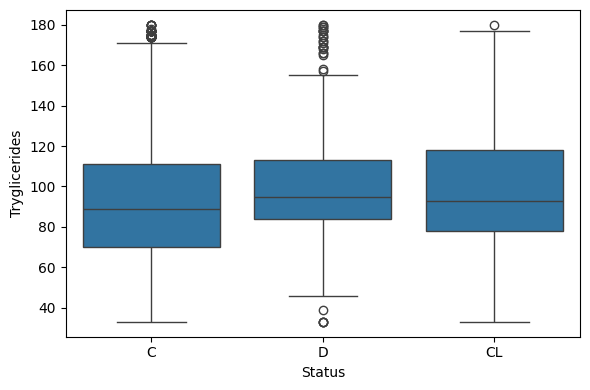

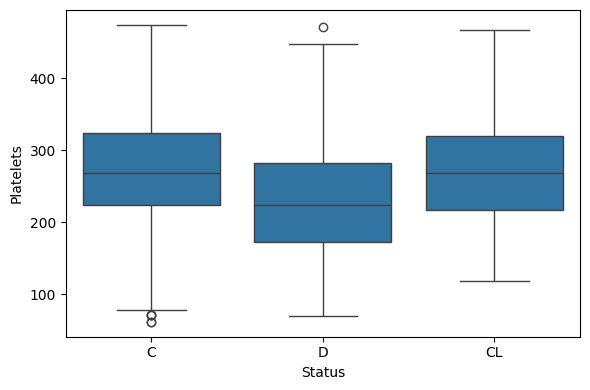

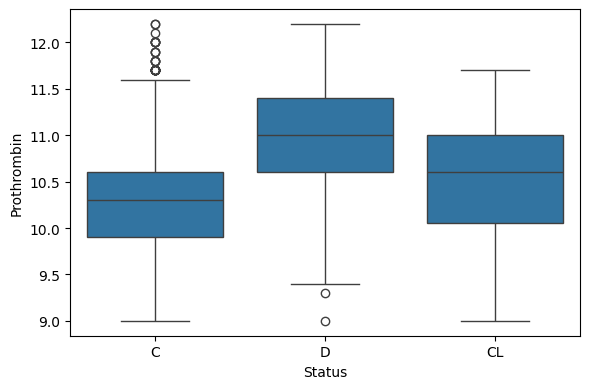

In [45]:
# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=category_col, y=col, data=train_df)
    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=category_col, y=col, data=df_clean)
    plt.tight_layout()
    plt.show()


In [46]:
X = train_df.drop('Status', axis=1)
y = train_df['Status']

In [47]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8047619047619048
F1 Score: 0.5135304846555813
Confusion Matrix:
 [[793   1  56]
 [ 26   0  12]
 [150   1 221]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, oob_score=True, random_state=42)

In [50]:
y_pred_rf = rf.predict(X_val)
print("RF Accuracy:", accuracy_score(y_val, y_pred_rf))
print("RF Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))

RF Accuracy: 0.8626984126984127
RF Confusion Matrix:
 [[806   0  44]
 [ 23   0  15]
 [ 91   0 281]]


In [51]:
# ------------------ TEST SET ------------------

test_ids = test_df['id']
test_df.drop(['id'], axis=1, inplace=True)

In [52]:
# Encode categorical columns in test
test_df = pd.get_dummies(test_df, columns=cat_cols, drop_first=True, dtype=int)

# Align test columns with train
test_df = test_df.reindex(columns=X.columns, fill_value=0)

In [53]:
probs = rf.predict_proba(test_df)

# Map back class names: C, CL, D
#class_names = le.inverse_transform([0,1,2])

In [54]:
submission = pd.DataFrame({
    'id': test_ids,
    'Status_C': probs[:,0],
    'Status_CL': probs[:,1],
    'Status_D': probs[:,2]
})

In [55]:
submission.to_csv('submission.csv', index=False)
print("Submission saved successfully!")

Submission saved successfully!
